In [ ]:

!pip install keras==2.1.0

     |████████████████████████████████| 307kB 4.9MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 33.2MB/s 
     |████████████████████████████████| 512kB 46.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9386ef4c628948d0b5d8ccd56cebf0ed94430d9293591f6aa9afc59e1479f2e4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import keras
import os, argparse
import cv2, spacy, numpy as np
from keras.layers import Input, LSTM, Embedding, Dense
from keras.applications.vgg16 import VGG16
from keras.models import model_from_json
from keras.optimizers import SGD
from sklearn.externals import joblib
from keras import backend as K
from keras.utils.vis_utils import plot_model
K.set_image_data_format('channels_first')
import csv

Using TensorFlow backend.


In [ ]:
!unzip FinalDataset.zip

Archive:  FinalDataset.zip
  inflating: FinalDataset/1.jpg      
  inflating: FinalDataset/10.jpg     
  inflating: FinalDataset/100.jpg    
  inflating: FinalDataset/1000.jpg   
  inflating: FinalDataset/1001.jpg   
  inflating: FinalDataset/1002.jpg   
  inflating: FinalDataset/1003.jpg   
  inflating: FinalDataset/1004.jpg   
  inflating: FinalDataset/1005.jpg   
  inflating: FinalDataset/1006.jpg   
  inflating: FinalDataset/1007.jpg   
  inflating: FinalDataset/1008.jpg   
  inflating: FinalDataset/1009.jpg   
  inflating: FinalDataset/101.jpg    
  inflating: FinalDataset/1010.jpg   
  inflating: FinalDataset/1011.jpg   
  inflating: FinalDataset/1012.jpg   
  inflating: FinalDataset/1013.jpg   
  inflating: FinalDataset/1014.jpg   
  inflating: FinalDataset/1015.jpg   
  inflating: FinalDataset/1016.jpg   
  inflating: FinalDataset/1017.jpg   
  inflating: FinalDataset/1018.jpg   
  inflating: FinalDataset/1019.jpg   
  inflating: FinalDataset/102.jpg    
  inflating: FinalDatas

In [ ]:
from keras.preprocessing import image
from keras.applications import vgg16
from keras.models import Model

In [ ]:
model = vgg16.VGG16(weights='imagenet', include_top=True)











Instructions for updating:
keep_dims is deprecated, use keepdims instead
553467904/553467096 [==============================] - 12s 0us/step


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

def get_image_features_without_fd(image_file_name,model):
    ''' Runs the given image_file to VGG 16 model and returns the 
    weights (filters) as a 1, 4096 dimension vector '''
    img = image.load_img(image_file_name, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(input=model.input, output=model.get_layer('fc2').output)
    fc2_features = model_extractfeatures.predict(x)
    image_features = fc2_features.reshape(4096)
    return image_features

In [ ]:
def get_image_model_without():
    ''' Takes the CNN weights file, and returns the VGG model update 
    with the weights. Requires the file VGG.py inside models/CNN '''
    image_model = VGG16(weights='imagenet', include_top=False)
    image_model.layers.pop()
    image_model.layers.pop()
    # this is standard VGG 16 without the last two layers
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    # one may experiment with "adam" optimizer, but the loss function for
    # this kind of task is pretty standard
    image_model.compile(optimizer=sgd, loss='categorical_crossentropy')
    return image_model

In [ ]:
vgg_without = get_image_model_without()

58892288/58889256 [==============================] - 2s 0us/step

Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [ ]:
def get_question_features_without_fd(question):
    ''' For a given question, a unicode string, returns the time series vector
    with each word (token) transformed into a 300 dimension representation
    calculated using Glove Vector '''
    word_embeddings = spacy.load('en_core_web_md')
    tokens = word_embeddings(question)
    question_tensor = np.zeros((30, 300))
    for j in range(len(tokens)):
        question_tensor[j,:] = tokens[j].vector
    return question_tensor

In [ ]:
from keras.preprocessing import image
from keras.applications import vgg16
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
model = vgg16.VGG16(weights='imagenet', include_top=True)

In [ ]:
from keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
#Image(retina=True, filename='model.png')

In [ ]:

def get_image_features_without_fd(image_file_name,model):
    ''' Runs the given image_file to VGG 16 model and returns the 
    weights (filters) as a 1, 4096 dimension vector '''
    img = image.load_img(image_file_name, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(input=model.input, output=model.get_layer('fc2').output)
    fc2_features = model_extractfeatures.predict(x)
    image_features = fc2_features.reshape(4096)
    return image_features

In [ ]:
def get_VQA_model():
    ''' Given the VQA model and its weights, compiles and returns the model '''

    # thanks the keras function for loading a model from JSON, this becomes
    # very easy to understand and work. Alternative would be to load model
    # from binary like cPickle but then model would be obfuscated to users
    with open('our_model_final.json','r') as f:
      vqa_model = keras.models.model_from_json(f.read())
    # vqa_model.load_weights(VQA_weights_file_name)
    vqa_model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    return vqa_model

In [ ]:
our_vqa_model = get_VQA_model()
our_vqa_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_2 (Merge)              (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_6 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
__________

In [ ]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 6.3MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=3ba10bfbfd685a421872354dbdd2e2ae5bbcb74c7ab4dbde8b69525e966f9a6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-bkr1015y/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
word_embeddings = spacy.load('en_core_web_md')

In [ ]:
def get_question_features_without_fd(question,word_embeddings):
    ''' For a given question, a unicode string, returns the time series vector
    with each word (token) transformed into a 300 dimension representation
    calculated using Glove Vector '''
    tokens = word_embeddings(question)
    question_tensor = np.zeros((30, 300))
    for j in range(len(tokens)):
        question_tensor[j,:] = tokens[j].vector
    return question_tensor

In [ ]:
def create_image_feature_test(image_path,model):
  image_features = get_image_features_without_fd(image_path,model)
  image_feature_processed = np.array(image_features)
  image_feature_processed = image_feature_processed.reshape((1,image_feature_processed.shape[0]))
  return image_feature_processed

In [ ]:
new_image = create_image_feature_test('FinalDataset/8.jpg',model)

In [ ]:
new_image.shape

(1, 4096)

In [ ]:
def create_question_feature_test(text):
  question_feature=get_question_features_without_fd(text,word_embeddings)
  question_feature_processed = np.array(question_feature)  
  question_feature_processed = question_feature_processed.reshape((1,question_feature_processed.shape[0], question_feature_processed.shape[1]))
  return question_feature_processed

In [ ]:
training_datas = []
with open('vqa_training_final.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    #print (row)
    training_datas.append(row)
training_datas = training_datas[1:]
len(training_datas)

28031

In [ ]:
trainY= []
for training_data in training_datas:
  img_id,text,output = training_data
  trainY.append(output)
print(len(trainY))
#print(trainY)

28031


In [ ]:
set_trainy = list(set(trainY))
trainY_labels = []
for y in trainY:
  trainY_labels.append(set_trainy.index(y))
#print(trainY_labels)

In [ ]:
trainY_cate = keras.utils.to_categorical(trainY_labels, num_classes=22)

In [ ]:
trainX= []
count = 0
for training_data in training_datas:
  img_id,text,output = training_data
  #print("Processing {} image".format(img_id))
  print(count)
  count = count + 1
  image_features = get_image_features_without_fd("FinalDataset/{}.jpg".format(img_id),model)
  question_features = get_question_features_without_fd(text,word_embeddings)
  trainX.append([question_features,image_features])
np.array(trainX).shape

Streaming output truncated to the last 5000 lines.
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
23136
23137
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
23149
23150
23151
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23168
23169
23170
23171
23172
23173
23174
23175
23176
23177
23178
23179
23180
23181
23182
23183
23184
23185
23186
23187
23188
23189
2

(28031, 2)

In [ ]:
question_features_array = []
image_features_array = []
for x in trainX:
  question_features_array.append(x[0])
  image_features_array.append(x[1])

In [ ]:
question_features_array = np.array(question_features_array)
image_features_array = np.array(image_features_array)
print(question_features_array.shape)
print(image_features_array.shape)

(28031, 30, 300)
(28031, 4096)


In [ ]:
trainY= []
for training_data in training_datas:
  img_id,text,output = training_data
  trainY.append(output)
print(len(trainY))
#print(trainY)

28031


In [ ]:
set_trainy = list(set(trainY))
trainY_labels = []
for y in trainY:
  trainY_labels.append(set_trainy.index(y))
#print(trainY_labels)

In [ ]:
trainY_cate = keras.utils.to_categorical(trainY_labels, num_classes=22)

In [ ]:
history = our_vqa_model.fit([question_features_array,image_features_array],trainY_cate,5,10)

Epoch 1/10
 4250/28031 [===>..........................] - ETA: 10:41 - loss: 4.1831

KeyboardInterrupt: ignored

In [ ]:
 our_vqa_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


 #history = our_vqa_model.fit([question_features_array,image_features_array],trainY_cate,validation_split=0.33, epochs =10, batch_size=10)

Train on 18780 samples, validate on 9251 samples
Epoch 1/10
18780/18780 [==============================] - 308s 16ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2205 - val_acc: 0.9862
Epoch 2/10
18780/18780 [==============================] - 286s 15ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2205 - val_acc: 0.9862
Epoch 3/10
18780/18780 [==============================] - 290s 15ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2205 - val_acc: 0.9862
Epoch 4/10
18780/18780 [==============================] - 296s 16ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2205 - val_acc: 0.9862
Epoch 5/10
18780/18780 [==============================] - 298s 16ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2205 - val_acc: 0.9862
Epoch 6/10
18780/18780 [==============================] - 293s 16ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2205 - val_acc: 0.9862
Epoch 7/10
18780/18780 [==============================] - 292s 16ms/step - loss: 0.4351 - acc: 0.9729 - val_loss: 0.2

In [ ]:
from keras.callbacks import *
filepath="/content/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
model.fit_generator(datagen.flow([question_features_array,image_features_array], trainY_cate, batch_size=64),
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks_list)

NameError: ignored

In [ ]:
our_vqa_model.save_weights('/content/model_weights_after_training.h5')

# Save the model architecture
with open('/content/model_architecture_after_training.json', 'w') as f:
    f.write(our_vqa_model.to_json())

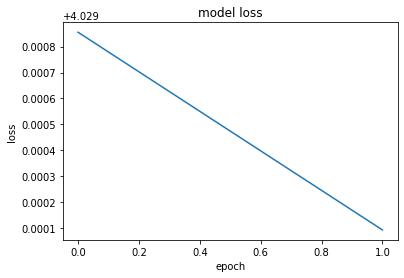

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
with open('/content/model_architecture_after_training.json', 'r') as f:
    vqa_model = model_from_json(f.read())

# Load weights into the new model
vqa_model.load_weights('/content/model_weights_after_training.h5')

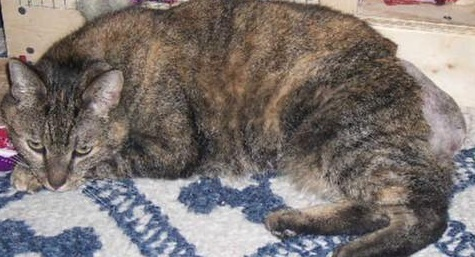

In [ ]:
from IPython.display import Image
Image(filename='FinalDataset/1038.jpg')

In [ ]:
new_question = create_question_feature_test("is this a dog")

In [ ]:
new_image = create_image_feature_test('FinalDataset/1038.jpg',model)


In [ ]:
result=set_trainy[vqa_model.predict_classes([new_question,new_image])[0]]

1/1 [==============================] - 0s 33ms/step


In [ ]:
print(result)

no
